
# Task 2 & 3: CENG414 homework 3

### Import libraries and get data into np array

In [347]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

### Actual k-means clustering function after initialization is done

In [348]:
def calc_distance(X1, X2):
    #Remove nan values when calculating euc distance
    indices_1 = np.isnan(X1)
    indices_2 = np.isnan(X2)
    indices_total = indices_1 + indices_2
    X1 = X1[~indices_total]
    X2 = X2[~indices_total]
    return(sum((X1 - X2)**2))**0.5

def cluster_kmeans(X,cluster,centroids):

    diff = 1
    while diff:
        # for each observation
        for i, row in enumerate(X):

            mn_dist = float('inf')
            # dist of the point from all centroids
            for idx, centroid in enumerate(centroids):
                d = calc_distance(centroid, row)

                # store closest centroid 
                if mn_dist > d:
                    mn_dist = d
                    cluster[i] = idx

        new_centroids = pd.DataFrame(X).groupby(by=cluster).mean().values   #start new iteration
        # if centroids are same then leave
        if np.count_nonzero(centroids-new_centroids) == 0:
            diff = 0
        else:
            centroids = new_centroids

    return centroids, cluster  

### K-means algorithm implementation

#### 3 Different initialization options for centroids of clusters: Random, Manual, Average

In [349]:
def kmeans(k, init, data,manual_init = None ):
  
    cluster = np.zeros(data.shape[0])                        #initialise all to 0

    if (init == "Random"):
        # select k random centroids
        random_indices = np.random.choice(len(data), size=k, replace=False)  #get random initial index
        centroids = data[random_indices, :]  #get 3 centroids, 12 row each

    elif (init == "Manual"):
        centroids = np.array(manual_init)

    elif (init == "Average"):
        new_data = np.array_split(data, k)                     #split dataset to k sets
        centroids = []
        for i in range(len(new_data)):
            avg_col = np.nanmean(new_data[i],axis=0)        #get average of each column 
            centroids.append(avg_col)                       #Cluster i's centroid is appended

    else:
        print("Error!")

    centroids, cluster = cluster_kmeans(data,cluster,centroids)
    return centroids, cluster  

### Code to Calculate DUNN Index of a value of k and it's clustering.

In [350]:
def findEucDistance(x1, y1):
    distance = 0
    for i in range(len(x1)):
        distance = distance + (x1[i] - y1[i])**2
    return distance**0.5 

In [351]:
def calcDunnIndex(points, cluster):

    numer = float('inf')
    for c1 in cluster:
        for c2 in cluster: # for each cluster vs cluster
            if (c1 == c2).all(): #ignore same cluster's comparison with itself
                continue
            intercluster_distance = findEucDistance(c1, c2)
            numer = min(numer, intercluster_distance) # find distance between centroids
            
    denom = 0
    for clst in cluster: # for each cluster
        for p in points:
            for t in points: # for each point vs point
                if (t == p).all():
                     continue           #ignore point's comparison with itself
                intracluster_distance = findEucDistance(t, p)
                denom = max(denom, intracluster_distance)
                
    return numer/denom


## Now main:

In [352]:
data = np.load("dataset.npy")

#### FILL missing values with the mean value of that attribute/column

In [353]:
column_means = np.nanmean(data,axis=0)

for i,row in enumerate(data):
    for j,cell in enumerate(row):
        if (np.isnan(cell)):
            data[i][j] = column_means[j]
df = pd.DataFrame(data)

#### Algorithm run with k values between [2,10]. DUNN Index for each K is saved.

In [354]:
dunnIndex_values = []
for k in range(2,11):
    init = "Random"
    centroids, clusters = kmeans(k,init,data)
    dunnIndex_values.append(calcDunnIndex(data,centroids))

#### Draw a "k versus Dunn index" plot.

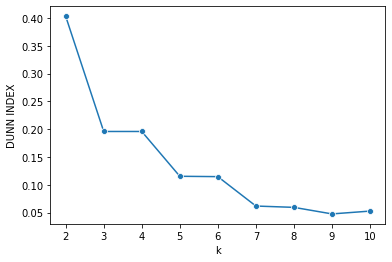

In [355]:
sns.lineplot(x=range(2,11), y=dunnIndex_values, marker='o')
plt.xlabel('k')
plt.ylabel('DUNN INDEX')
plt.show()

Since DUNN Index is the ratio of smallest inter-cluster distance and the largest intra-cluster distance, And we should minimize the inter-cluster distance function, which is to find the distance between two closest clusters, and on the other hand, maximize the intra-cluster distance function, which is to find the cluster with the largest diameter.
We can conclude that the large values of Dunn index represent better clustering.
Hence, K = 2, provides the best clustering for this dataset as it has the highest DUNN INDEX value.

In [356]:
k = 2
init = "Random"
centroidofClusters, clusters = kmeans(k,init,data)
print(clusters)

[0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Now we use t-Distributed Stochastic Neighbor Embedding (t-SNE) for dimensionality reduction as it is particularly well suited for the visualization of high-dimensional datasets. 
It is a probabilistic technique, we run the algorithm on the actual dimensions of data and reduce the dimensions to 2, so we can easily visualise with a 2-D graph.

In [357]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, init='random', learning_rate=200.0)
tsne_results = tsne.fit_transform(df)
tsne_df_scale = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.000s...
[t-SNE] Computed neighbors for 178 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 68.048926
[t-SNE] KL divergence after 250 iterations with early exaggeration: 49.391388
[t-SNE] KL divergence after 300 iterations: 0.089413


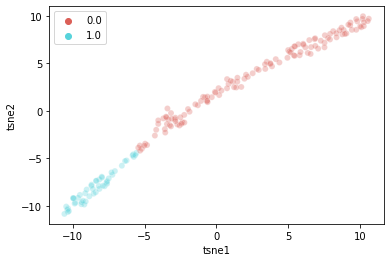

In [363]:
#plt.scatter(tsne_df_scale['tsne1'],tsne_df_scale['tsne2'],c=clusters,  cmap='rainbow')
#Choose K = 2 since we saw it to be the best k
sns.scatterplot(
    x='tsne1', y='tsne2',
    hue = clusters,
    palette=sns.color_palette("hls", 2),
    data=tsne_df_scale,
    legend="full",
    alpha=0.3
)
plt.show()

## TASK 3:

### Z-Score Normalization and repeating task 2

##### 1) Z-Score Normalize the DATA

In [372]:
column_means = np.nanmean(data,axis=0)
column_std   = np.nanstd(data,axis=0)
for i,row in enumerate(data):
    for j,cell in enumerate(row):
        data[i][j] = (data[i][j]-column_means[j])/column_std[j]

df = pd.DataFrame(data)

Normalization provides us with a method to transform the source data to another format effectively, although the data still keeps its features, however, we are able to minimize duplicated data. It makes it easier for our application of k-means, as the k-means algorithm gets more effective and efficient.
Also because we use Z-score normalization, we are able to take into account outlier datapoints in our dataset.

##### 2) Repeat Task 2 on normalized Data

Get DunnIndex vs K graph

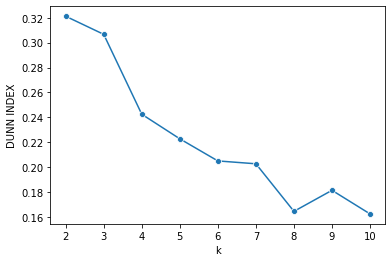

In [376]:
dunnIndex_values = []
for k in range(2,11):
    init = "Random"
    centroids, clusters = kmeans(k,init,data)
    dunnIndex_values.append(calcDunnIndex(data,centroids))

sns.lineplot(x=range(2,11), y=dunnIndex_values, marker='o')
plt.xlabel('k')
plt.ylabel('DUNN INDEX')
plt.show()

### Discussion on DUNN-INDEX vs K graph of Normalized Dataset:

The Values of DUNN-INDEX vs K graph are different than what we saw with a non-normalized dataset.

Now As we can see that K = 2 still has the highest DUNN index. However, K = 3's DUNN INDEX is also very similar so we can classify the data into 3 clusters as well.
Almost for all values of K, the DUNN Index Value has increased meaning that there is a better clustering with those number of clusters.

This helps us conclude that, Standardization prevents datapoints with larger scales from dominating how clusters are defined, giving us more viable options.

However, it is still important to note that the DUNN index value for K = 2 has fallen from when the dataset was not normalized. It has dropped from around 0.40 in non-normalized dataset for k = 2 to around 0.32 in normalized dataset for k = 2. However it has increased significantly for other values of k.

Although this difference is not alot, This can be due to this particular dataset and the effects of normalization on it. We can say that from a DUNN-Index point of view for K = 2 dataset without normalization was better. However, Using normalization we have better clustering and more viable options as we can later see in the visualization using t-SNE with K = 3.

Whole Normalized Dataset visualized using t-SNE

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 178 samples in 0.001s...
[t-SNE] Computed neighbors for 178 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 178 / 178
[t-SNE] Mean sigma: 1.834354
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.784180
[t-SNE] KL divergence after 300 iterations: 0.375500


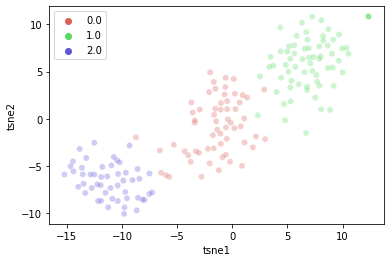

In [379]:

k = 3
init = "Random"
centroidofClusters, clusters = kmeans(k,init,data)

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, init='random', learning_rate=200.0)
tsne_results = tsne.fit_transform(df)
tsne_df_scale = pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])

sns.scatterplot(
    x='tsne1', y='tsne2',
    hue=clusters,
    palette=sns.color_palette("hls", k),
    data=tsne_df_scale,
    legend="full",
    alpha=0.3
)
plt.show()

### Further Discussion on Task 3:


As we can see in this clustering visualization provided by t-SNE dimensionality reduction, There is a clearer and more precise visual 2-D graph to represent these clusters.
This is possible due to the normalized data as it has provided us with more viable clustering's k options. The normalization has an effect on efficiency, visualization and clustering viability option for our dataset's clustering using k-means therefore, normalization has had an overall positive effect on the data and has been very useful.